In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Questions
<h3>1. What Experience groups most likely to look for new job?</h3>
<h3>
    2. Which Education level is most common among job seeker ?
</h3>
<h3>3. Do candidates with relevant Experience ,  have more training hours ?</h3>
<h3>4. What is the Avg Experience (in years) for each education level ?</h3>
<h3>5. Which Company type has the highest % of people waiting to switch the job ?</h3>

In [2]:
hr=pd.read_csv('aug_train.csv')
print("File read successfull")

File read successfull


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Finding Unique values in experience & last new job, to make data type in proper format

In [5]:
exp=hr['experience'].unique()
print(exp)

['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]


In [6]:
lnj=hr['last_new_job'].unique()
print(lnj)

['1' '>4' 'never' '4' '3' '2' nan]


<li> <b> Replacing noisy values</li>

In [7]:
hr['experience']=hr['experience'].replace({'>20':21,'<1':0})
hr['last_new_job']=hr['last_new_job'].replace({'>4':5,'never':0})

<li>After Replacement-</li>

In [8]:
exp=hr['experience'].unique()
print(exp)
lnj=hr['last_new_job'].unique()
print(lnj)

[21 '15' '5' 0 '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18' '19'
 '12' '3' '6' '9' '8' '20' nan]
['1' 5 0 '4' '3' '2' nan]


### Converting columns into numeric

In [9]:
hr['experience']=pd.to_numeric(hr['experience'],errors='coerce')
hr['last_new_job']=pd.to_numeric(hr['last_new_job'],errors='coerce')

In [10]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [11]:
hr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [12]:
gender_unique=hr['gender'].value_counts()
print(gender_unique)

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64


### Handling null valaues of Experience, Education Level and Company Type

In [13]:
hr.describe()

,enrollee_id,city_development_index,experience,last_new_job,training_hours,target
count,19158.000000,19158.000000,19093.000000,18735.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,10.100141,2.000427,65.366896,0.249348
std,9616.292592,0.123362,6.777024,1.675596,60.058462,0.432647
min,1.000000,0.448000,0.000000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,1.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,1.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,3.000000,88.000000,0.000000
max,33380.000000,0.949000,21.000000,5.000000,336.000000,1.000000


In [14]:
# unique values count of company types
comp=hr['company_type'].value_counts()
print(comp)

company_type
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64


In [15]:
hr['experience'].fillna(hr['experience'].median(),inplace=True)
hr['education_level'].fillna(hr['education_level'].mode()[0],inplace=True)
hr['company_type'].fillna('Unknown',inplace=True)

<li>Count of null values after replacements</li>

In [16]:
hr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level              0
major_discipline          2813
experience                   0
company_size              5938
company_type                 0
last_new_job               423
training_hours               0
target                       0
dtype: int64

#### que 1

In [17]:
hr.groupby('experience')['target'].mean()*100

experience
0.0     45.402299
1.0     42.440801
2.0     33.185448
3.0     35.302806
4.0     32.573058
5.0     28.811189
6.0     28.207237
7.0     29.474708
8.0     24.314214
9.0     22.583732
10.0    21.015228
11.0    22.740964
12.0    18.623482
13.0    19.298246
14.0    18.259386
15.0    16.618076
16.0    14.173228
17.0    16.666667
18.0    15.357143
19.0    17.434211
20.0    22.297297
21.0    15.307365
Name: target, dtype: float64

#### que 2

In [18]:
hr[hr['target']==1.0]['education_level'].value_counts()

education_level
Graduate          3349
Masters            935
High School        394
Phd                 58
Primary School      41
Name: count, dtype: int64

que 3

In [19]:
hr.groupby('experience')['training_hours'].sum().sort_values(ascending=False)


experience
21.0    212502
5.0      96151
4.0      91287
3.0      88930
6.0      80995
2.0      71269
9.0      67134
7.0      66267
10.0     63710
8.0      54450
15.0     44955
11.0     42271
14.0     41019
1.0      35861
16.0     34991
12.0     34686
0.0      32029
13.0     25330
19.0     20809
17.0     20035
18.0     18665
20.0      8953
Name: training_hours, dtype: int64

que 4

In [20]:
hr.groupby('education_level')['training_hours'].mean()

education_level
Graduate          65.875601
High School       66.680714
Masters           63.270809
Phd               67.524155
Primary School    63.626623
Name: training_hours, dtype: float64

que 5

In [21]:
hr.groupby('company_type')['enrollee_id'].sum().sort_values(ascending=False)

company_type
Pvt Ltd                162308307
Unknown                107822722
Funded Startup          16231583
Public Sector           15940585
Early Stage Startup     10172517
NGO                      8828674
Other                    1993724
Name: enrollee_id, dtype: int64

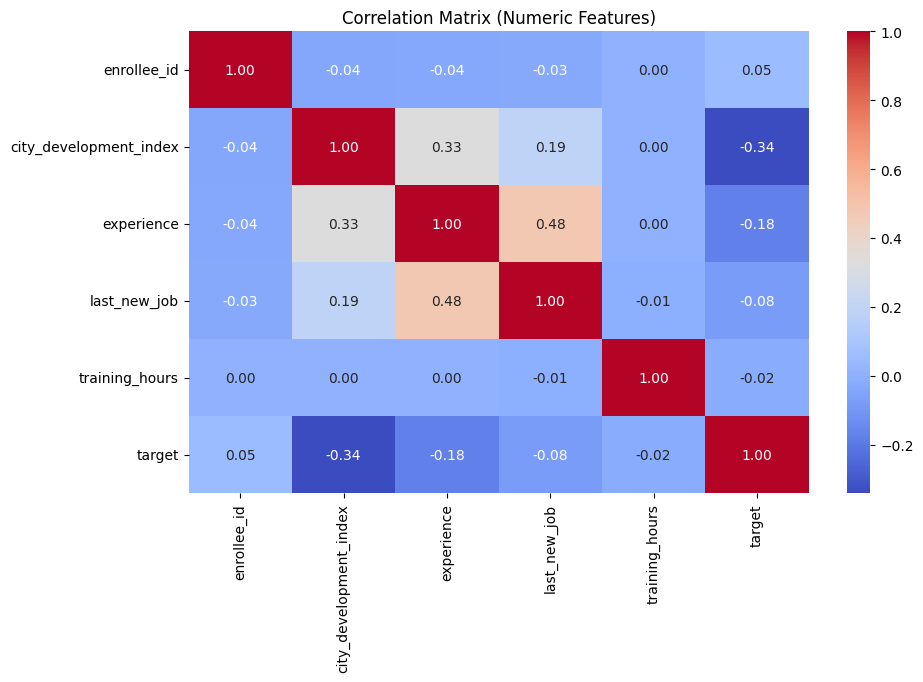

In [22]:
num_cols = hr.select_dtypes(include='number')
corr_matrix = num_cols.corr()

# 📈 Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

# 📊 Bar Plot: Target vs Company Type
plt.figure(figsize=(8, 5))
sns.countplot(data=hr, x='company_type', hue='target')
plt.title("Job Change Intention by Company Type")
plt.xlabel("Company Type")
plt.ylabel("Count")
plt.legend(title='Wants to Switch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Education  Vs Target

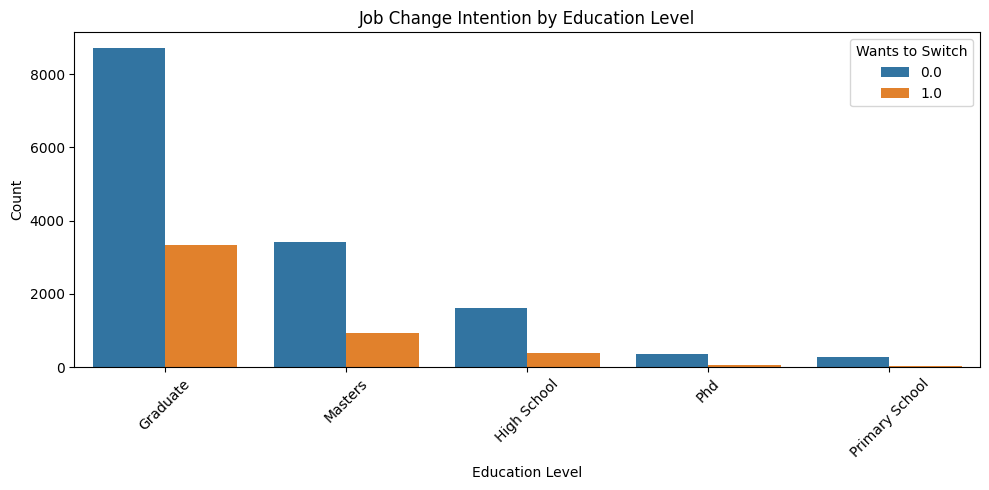

In [23]:
# 📊 Count Plot: Education vs Target
plt.figure(figsize=(10, 5))
sns.countplot(data=hr, x='education_level', hue='target', order=hr['education_level'].value_counts().index)
plt.title("Job Change Intention by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title='Wants to Switch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Experience Vs Target

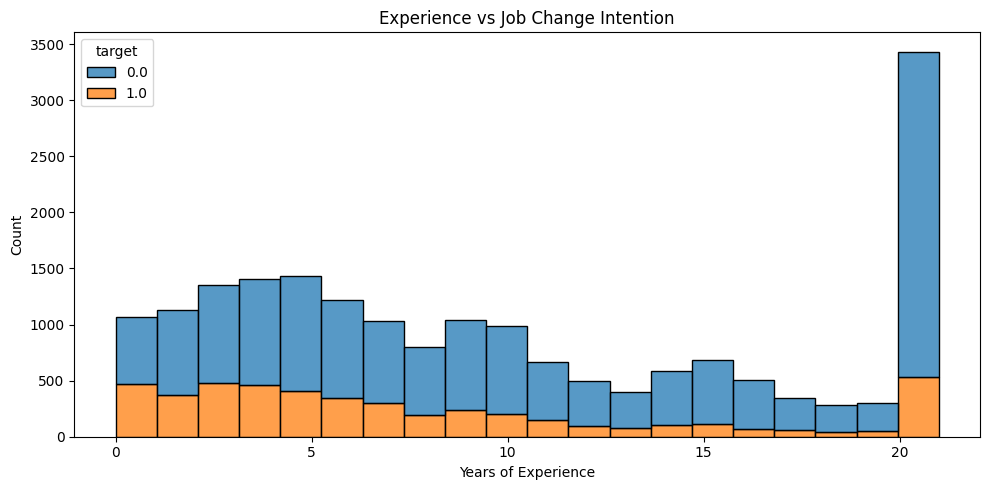

In [24]:
# 📊 Experience vs Target
plt.figure(figsize=(10, 5))
sns.histplot(data=hr, x='experience', hue='target', multiple='stack', kde=False, bins=20)
plt.title("Experience vs Job Change Intention")
plt.xlabel("Years of Experience")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#  Training Hours vs Target, Split by Experience</h2>

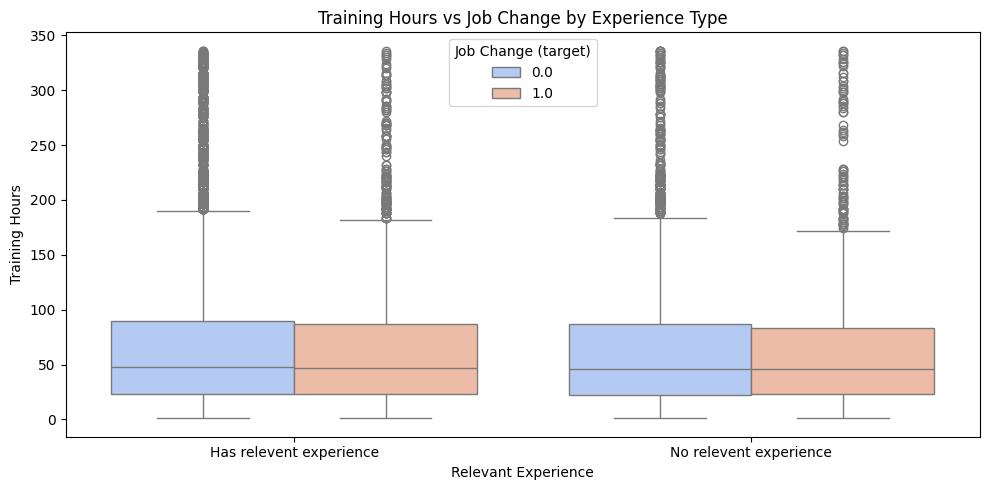

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data=hr, x='relevent_experience', y='training_hours', hue='target', palette='coolwarm')
plt.title('Training Hours vs Job Change by Experience Type')
plt.xlabel('Relevant Experience')
plt.ylabel('Training Hours')
plt.legend(title='Job Change (target)')
plt.tight_layout()
plt.show()

Among those without relevant experience, people who have spent more time training are more likely to switch jobs.<br>
This shows that self-improvement through training might be a signal that someone is actively preparing to move to a better opportunity

# FacetGrid: City Index vs Training Hours for Target Classes

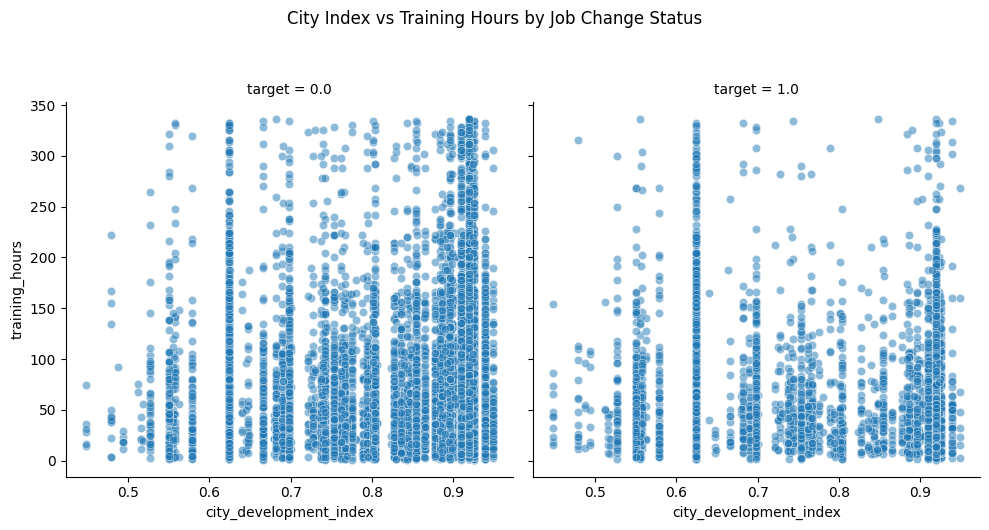

In [26]:
g = sns.FacetGrid(hr, col='target', height=5)
g.map(sns.scatterplot, 'city_development_index', 'training_hours', alpha=0.5)
g.fig.suptitle("City Index vs Training Hours by Job Change Status", y=1.05)
plt.tight_layout()
plt.show()

#### Summary
🧮 Correlation Analysis

    🔹 City Development Index shows the strongest negative correlation with job change intent (-0.34), indicating that candidates in less developed cities are more likely to switch jobs.

    🔹 Experience has a weak negative correlation (-0.18), suggesting that less experienced candidates tend to explore new job opportunities more frequently.

    🔹 Training Hours and other numeric variables show very low or no correlation, implying they have minimal direct influence on job change intent.

🏢 Company Type vs Job Change Intent

    🔹 Private Ltd (Pvt Ltd) companies employ the largest portion of the workforce and also account for most job switchers.

    🔹 Startups (both funded and early stage) have smaller employee bases, but a higher proportion of employees looking to switch, possibly due to job instability or lack of career growth.

    🔹 Employees in the Public Sector and NGOs show the least intention to switch, likely due to job security and long-term benefits.


🏢 Education vs Job Change Intent

    🔹Graduates show the highest desire to switch jobs among all education levels.

    🔹Master's degree holders have a considerable presence but lower intention to switch jobs than graduates.


🏢 Eperience  vs Job Change Intent

    🔹High job change intention is seen among professionals with less than 10 years of experience, especially:

          1–3 years: Balanced but leaning slightly toward switching jobs.

         4–7 years: Strong presence of individuals looking to change jobs.

    * Stability increases after the 10-year mark:

    10–15 years: Majority prefer to stay, with declining switch intention.

    20 years: Highest count overall, mostly indicating job retention.

 City Development Index and Experience show negative correlation with job change intent — less developed cities and less experienced professionals are more likely to switch.
 Pvt Ltd companies see the highest job switch rates, while public sector and NGO employees show the least intent to change.
Graduates show the highest desire to switch jobs, followed by master's holders with moderate intent.
Job switching is highest among professionals with 1–7 years of experience, while those with over 10 years tend to stay longer.

# Prediction - User can get job or not

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [28]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19158 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

#### null Values Handling

In [29]:
hr.isnull().sum()
# hr.head()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level              0
major_discipline          2813
experience                   0
company_size              5938
company_type                 0
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [30]:
for col in hr.columns:
    print(f"\nColumn: {col}")
    print(hr[col].unique())



Column: enrollee_id
[ 8949 29725 11561 ... 24576  5756 23834]

Column: city
['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city

In [31]:

hr['company_size'].fillna(hr['company_size'].mode()[0], inplace=True)

hr['enrolled_university'].fillna(hr['enrolled_university'].mode()[0], inplace=True)
hr['major_discipline'].fillna(hr['major_discipline'].mode()[0], inplace=True)
hr['gender'].fillna(hr['gender'].mode()[0], inplace=True)

hr['last_new_job'].fillna(hr['last_new_job'].median(), inplace=True)

In [32]:
hr.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

#### Labelling of category

In [33]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['company_size', 'company_type', 'enrolled_university','major_discipline', 'gender', 'education_level', 'relevent_experience']


from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    hr[col] = le.fit_transform(hr[col])  # Ensure all values are strings
    label_encoders[col] = le

    print(f"\nColumn: {col} — Label Mapping:")
    for category, code in zip(le.classes_, le.transform(le.classes_)):
        print(f"{category} ➜ {code}")



Column: company_size — Label Mapping:
10/49 ➜ 0
100-500 ➜ 1
1000-4999 ➜ 2
10000+ ➜ 3
50-99 ➜ 4
500-999 ➜ 5
5000-9999 ➜ 6
<10 ➜ 7

Column: company_type — Label Mapping:
Early Stage Startup ➜ 0
Funded Startup ➜ 1
NGO ➜ 2
Other ➜ 3
Public Sector ➜ 4
Pvt Ltd ➜ 5
Unknown ➜ 6

Column: enrolled_university — Label Mapping:
Full time course ➜ 0
Part time course ➜ 1
no_enrollment ➜ 2

Column: major_discipline — Label Mapping:
Arts ➜ 0
Business Degree ➜ 1
Humanities ➜ 2
No Major ➜ 3
Other ➜ 4
STEM ➜ 5

Column: gender — Label Mapping:
Female ➜ 0
Male ➜ 1
Other ➜ 2

Column: education_level — Label Mapping:
Graduate ➜ 0
High School ➜ 1
Masters ➜ 2
Phd ➜ 3
Primary School ➜ 4

Column: relevent_experience — Label Mapping:
Has relevent experience ➜ 0
No relevent experience ➜ 1


In [34]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  int32  
 4   relevent_experience     19158 non-null  int32  
 5   enrolled_university     19158 non-null  int32  
 6   education_level         19158 non-null  int32  
 7   major_discipline        19158 non-null  int32  
 8   experience              19158 non-null  float64
 9   company_size            19158 non-null  int32  
 10  company_type            19158 non-null  int32  
 11  last_new_job            19158 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int32(7), int64(2), obj

#### Logistic Regression - For predicting user can get job or not 

In [35]:

x = hr[['city_development_index','experience','training_hours','company_size', 'company_type', 'enrolled_university',
                    'major_discipline', 'gender', 'education_level', 'relevent_experience']]
y = hr['target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [38]:
y_pred = model.predict(X_test)

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7677453027139874
Confusion Matrix:
 [[2696  184]
 [ 706  246]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      2880
         1.0       0.57      0.26      0.36       952

    accuracy                           0.77      3832
   macro avg       0.68      0.60      0.61      3832
weighted avg       0.74      0.77      0.73      3832



In [40]:


# Category mappings
company_size_map = {
    0: '<10',
    1: '10/49',
    2: '100-500',
    3: '1000-4999',
    4: '10000+',
    5: '50-99',
    6: '500-999',
    7: '5000-9999',
    8: 'Unknown'
}

company_type_map = {
    0: 'Early Stage Startup',
    1: 'Funded Startup',
    2: 'NGO',
    3: 'Other',
    4: 'Public Sector',
    5: 'Pvt Ltd',
    6: 'Unknown'
}

enrolled_university_map = {
    0: 'Full time course',
    1: 'Part time course',
    2: 'no_enrollment',
    3: 'Unknown'
}

major_discipline_map = {
    0: 'Arts',
    1: 'Business Degree',
    2: 'Humanities',
    3: 'No Major',
    4: 'Other',
    5: 'STEM',
    6: 'Unknown'
}

gender_map = {
    0: 'Female',
    1: 'Male',
    2: 'Other',
    3: 'Unknown'
}

education_level_map = {
    0: 'Graduate',
    1: 'High School',
    2: 'Masters',
    3: 'Phd',
    4: 'Primary School',
    5: 'Unknown'
}

relevent_experience_map = {
    0: 'Has relevent experience',
    1: 'No relevent experience'
}


print("Enter the following values as prompted:\n")

city_dev_index = float(input("City Development Index (0.0 - 1.0): "))
experience = float(input("Years of Experience (numeric): "))
training_hours = int(input("Training Hours (numeric): "))

def prompt_choice(prompt, mapping):
    print(f"\n{prompt}")
    for k, v in mapping.items():
        print(f"{k} → {v}")
    return int(input("Enter the number corresponding to your choice: "))

company_size = prompt_choice("Company Size Options:", company_size_map)
company_type = prompt_choice("Company Type Options:", company_type_map)
enrolled_university = prompt_choice("Enrolled University Options:", enrolled_university_map)
major_discipline = prompt_choice("Major Discipline Options:", major_discipline_map)
gender = prompt_choice("Gender Options:", gender_map)
education_level = prompt_choice("Education Level Options:", education_level_map)
relevent_experience =float( prompt_choice("Relevent Experience Options:", relevent_experience_map))


input_df = pd.DataFrame([{
    'city_development_index': city_dev_index,
    'experience': experience,
    'training_hours': training_hours,
    'company_size': company_size,
    'company_type': company_type,
    'enrolled_university': enrolled_university,
    'major_discipline': major_discipline,
    'gender': gender,
    'education_level': education_level,
    'relevent_experience': relevent_experience
}])


Enter the following values as prompted:



City Development Index (0.0 - 1.0):  0.3
Years of Experience (numeric):  3
Training Hours (numeric):  4



Company Size Options:
0 → <10
1 → 10/49
2 → 100-500
3 → 1000-4999
4 → 10000+
5 → 50-99
6 → 500-999
7 → 5000-9999
8 → Unknown


Enter the number corresponding to your choice:  1



Company Type Options:
0 → Early Stage Startup
1 → Funded Startup
2 → NGO
3 → Other
4 → Public Sector
5 → Pvt Ltd
6 → Unknown


Enter the number corresponding to your choice:  1



Enrolled University Options:
0 → Full time course
1 → Part time course
2 → no_enrollment
3 → Unknown


Enter the number corresponding to your choice:  2



Major Discipline Options:
0 → Arts
1 → Business Degree
2 → Humanities
3 → No Major
4 → Other
5 → STEM
6 → Unknown


Enter the number corresponding to your choice:  2



Gender Options:
0 → Female
1 → Male
2 → Other
3 → Unknown


Enter the number corresponding to your choice:  1



Education Level Options:
0 → Graduate
1 → High School
2 → Masters
3 → Phd
4 → Primary School
5 → Unknown


Enter the number corresponding to your choice:  0



Relevent Experience Options:
0 → Has relevent experience
1 → No relevent experience


Enter the number corresponding to your choice:  1


In [42]:
pred_user= model.predict(input_df)
if(pred_user== 1):
    print("able to hired")
else:
    print("not able to hired")

able to hired
